In [ ]:
#Description: This program detects breast cancer, based off of data.

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

#load the data
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
#Count the number of rows and columns in the data set
df.shape


(569, 33)

In [7]:
#Count the number of empty(NaN ,NAN, na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#Drop the column with all missing values
df = df.dropna(axis=1)

In [9]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

In [10]:
#Get a count of the number of Malognant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

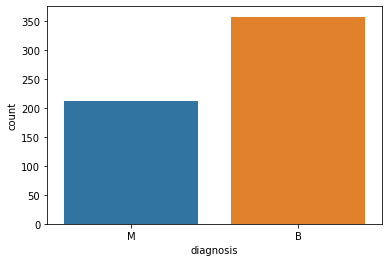

In [11]:
#Visualize the count
sns.countplot(df['diagnosis'],label='count')

In [12]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y= LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

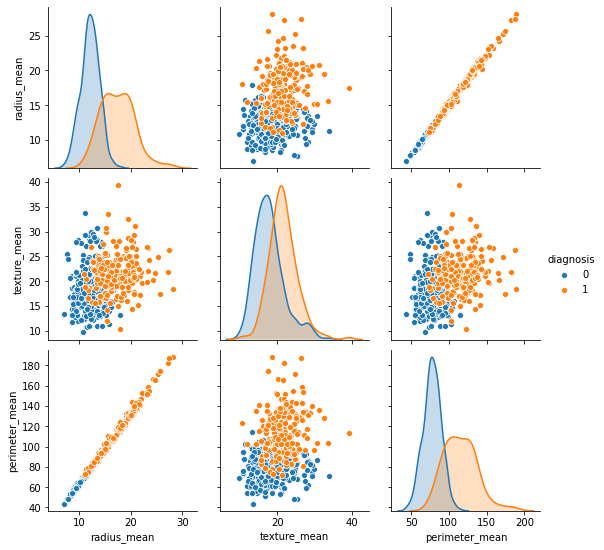

In [14]:
#Creating  a pair plot
sns.pairplot(df.iloc[:,1:5],hue='diagnosis')

In [15]:
#to print 5rows of dta
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
#correlation of columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [17]:
#visuaLizing correlation

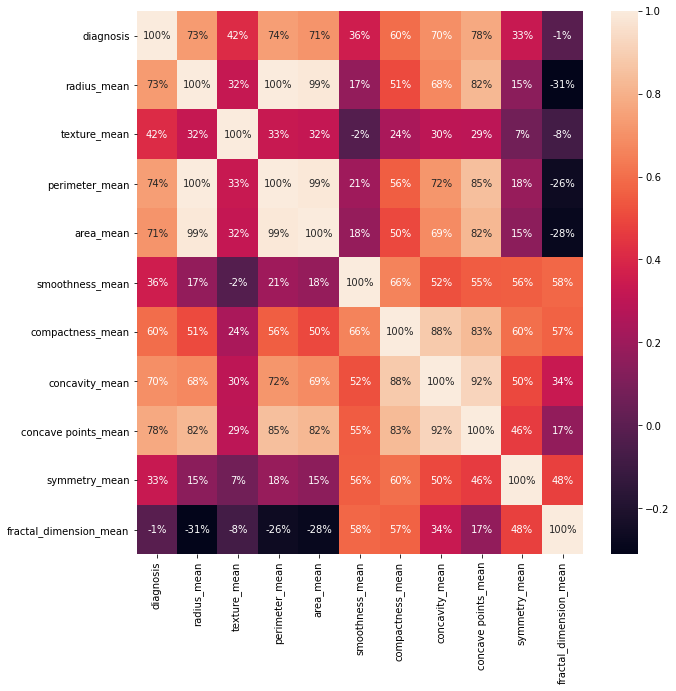

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%')

In [19]:
#spliting the data into dependent and independent sets
X=df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [72]:
#spliting the data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size =0.25 ,random_state =0)
print(X_train)

[[1.822e+01 1.670e+01 1.203e+02 1.033e+03 1.148e-01 1.485e-01 1.772e-01
  1.060e-01 2.092e-01 6.310e-02 8.337e-01 1.593e+00 4.877e+00 9.881e+01
  3.899e-03 2.961e-02 2.817e-02 9.222e-03 2.674e-02 5.126e-03 2.060e+01
  2.413e+01 1.351e+02 1.321e+03 1.280e-01 2.297e-01 2.623e-01 1.325e-01
  3.021e-01]
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01]
 [1.026e+01 1.658e+01 6.585e+01 3.208e+02 8.877e-02 8.066e-02 4.358e-02
  2.438e-02 1.669e-01 6.714e-02 1.144e-01 1.023e+00 9.887e-01 7.326e+00
  1.027e-02 3.084e-02 2.613e-02 1.097e-02 2.277e-02 5.890e-03 1.083e+01
  2.204e+01 7.108e+01 3.574e+02 1.461e-01 2.246e-01 1.783e-01 8.333e-02
  2.691e-01]
 [1.194e+01 1.824e+01 7.571e+01 4.376e+02 8.261e-02 4.751e-02 1.972e-02
  1.349e-02 1.868e-01 6.1

In [21]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [22]:
#creating a function
def models(X_train, Y_train):
    #logic regression
    from sklearn.linear_model import LogisticRegression
    log= LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    #Descion time
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion ='entropy',random_state=0)
    tree.fit(X_train, Y_train)
    
    #randomforest clssifier
    from sklearn.ensemble import RandomForestClassifier
    forest =RandomForestClassifier( n_estimators =10, criterion ='entropy',random_state=0)
    forest.fit(X_train, Y_train)
    
    #printing models accuracy
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1] DecisionTree Training Accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest Training Accuracy:', forest.score(X_train, Y_train))
    
    return log,tree,forest

In [23]:
# calling model funct
model=models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1] DecisionTree Training Accuracy: 1.0
[2] Random Forest Training Accuracy: 0.9953051643192489


In [24]:
#testing accuracy
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    print('Model ',i)
    cm =confusion_matrix(Y_test, model[i].predict(X_test))
    TP = cm[0][0]
    print(TP)
    TN =cm[1][1]
    print(TN)
    FN =cm[1][0]
    FP =cm[0][1]
    print( cm)
    print('Testing Accuracy =',(TP + TN)/(TP +TN +FN +FP))
    print()

Model  0
86
50
[[86  4]
 [ 3 50]]
Testing Accuracy = 0.951048951048951

Model  1
83
51
[[83  7]
 [ 2 51]]
Testing Accuracy = 0.9370629370629371

Model  2
87
51
[[87  3]
 [ 2 51]]
Testing Accuracy = 0.965034965034965



In [25]:
#show  merits of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print( classification_report(Y_test, model[0].predict(X_test)))
print( accuracy_score(Y_test, model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


In [26]:
#print the prediction of randomforest model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [2]:
d = pd.read_csv('C:\\Users\\DELL\\dataa.csv')
d.head(10)

NameError: name 'pd' is not defined

In [43]:
d = d.dropna(axis=1)

In [1]:
d.head(12)

NameError: name 'd' is not defined

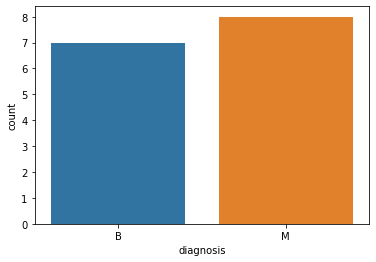

In [45]:
#Visualize the count
sns.countplot(d['diagnosis'],label='count')

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y= LabelEncoder()
d.iloc[:,1] = labelencoder_Y.fit_transform(d.iloc[:,1].values)
d.iloc[:,1]

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    1
Name: diagnosis, dtype: int32

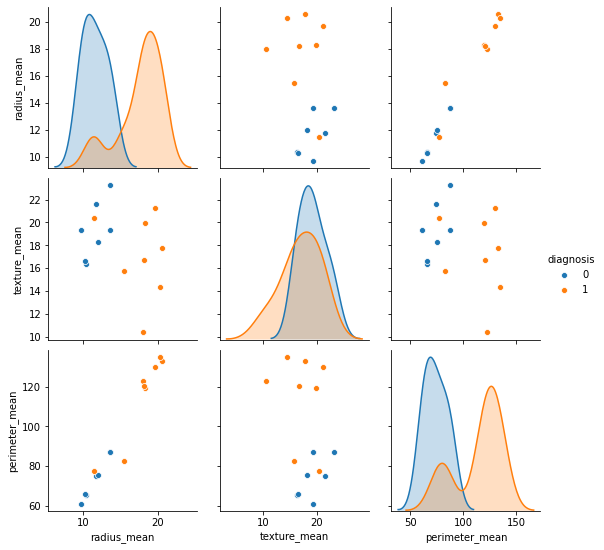

In [47]:
sns.pairplot(d.iloc[:,1:5],hue='diagnosis')

In [48]:
d.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
d.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


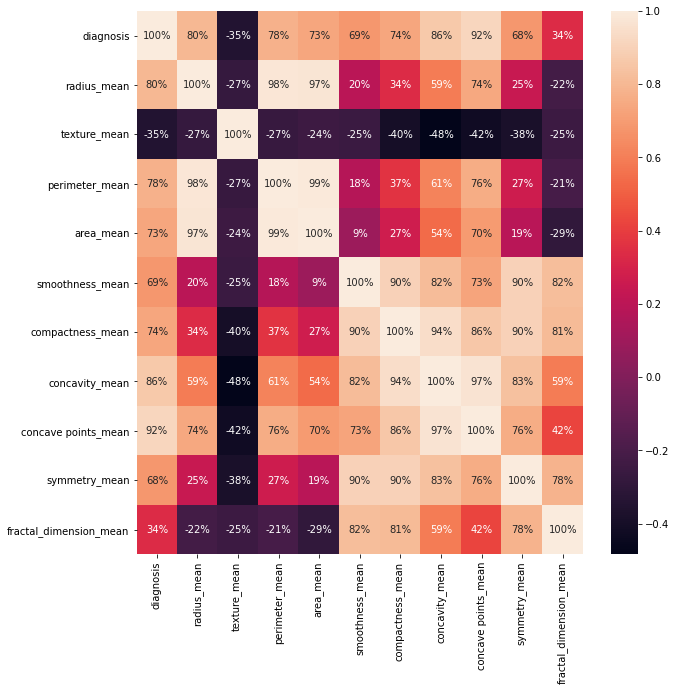

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(d.iloc[:,1:12].corr(),annot=True, fmt='.0%')

In [59]:
X=d.iloc[:,2:31].values
Y = d.iloc[:,1].values
x=df.iloc[:,2:31].values
y = df.iloc[:,1].values

In [62]:
from sklearn.model_selection import train_test_split
X_train, Y_train =x,y
X_test,Y_test=X,Y


[[1.362e+01 2.323e+01 8.719e+01 5.732e+02 9.246e-02 6.747e-02 2.974e-02
  2.444e-02 1.664e-01 5.801e-02 3.460e-01 1.336e+00 2.066e+00 3.124e+01
  5.868e-03 2.099e-02 2.021e-02 9.064e-03 2.087e-02 2.583e-03 1.535e+01
  2.909e+01 9.758e+01 7.298e+02 1.216e-01 1.517e-01 1.049e-01 7.174e-02
  2.642e-01]
 [1.032e+01 1.635e+01 6.531e+01 3.249e+02 9.434e-02 4.994e-02 1.012e-02
  5.495e-03 1.885e-01 6.201e-02 2.104e-01 9.670e-01 1.356e+00 1.297e+01
  7.086e-03 7.247e-03 1.012e-02 5.495e-03 1.560e-02 2.606e-03 1.125e+01
  2.177e+01 7.112e+01 3.849e+02 1.285e-01 8.842e-02 4.384e-02 2.381e-02
  2.681e-01]
 [1.026e+01 1.658e+01 6.585e+01 3.208e+02 8.877e-02 8.066e-02 4.358e-02
  2.438e-02 1.669e-01 6.714e-02 1.144e-01 1.023e+00 9.887e-01 7.326e+00
  1.027e-02 3.084e-02 2.613e-02 1.097e-02 2.277e-02 5.890e-03 1.083e+01
  2.204e+01 7.108e+01 3.574e+02 1.461e-01 2.246e-01 1.783e-01 8.333e-02
  2.691e-01]
 [9.683e+00 1.934e+01 6.105e+01 2.857e+02 8.491e-02 5.030e-02 2.337e-02
  9.615e-03 1.580e-01 6.2

In [63]:
sc= StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [64]:
                                      #testing accuracy
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    print('Model ',i)
    cm =confusion_matrix(Y_test, model[i].predict(X_test))
    TP = cm[0][0]
    TN =cm[1][1]
    FN =cm[1][0]
    FP =cm[0][1]
    print( cm)
    print('Testing Accuracy =',(TP + TN)/(TP +TN +FN +FP))
    print()


Model  0
[[7 0]
 [1 7]]
Testing Accuracy = 0.9333333333333333

Model  1
[[7 0]
 [0 8]]
Testing Accuracy = 1.0

Model  2
[[7 0]
 [0 8]]
Testing Accuracy = 1.0



In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(Y_test, model[0].predict(X_test)))
print(accuracy_score(Y_test, model[0].predict(X_test))) 
                                                  #print the prediction of randomforest model
pred = model[0].predict(X_test)
print(pred)
print()
print(Y_test)

NameError: name 'Y_test' is not defined